Ingresa el nombre del equipo que deseas analizar: Boca Juniors

Análisis para el equipo: Boca Juniors
Accuracy: 0.92
Confusion Matrix:
[[25  3  0]
 [ 1 17  2]
 [ 0  0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.85      0.85      0.85        20
           2       0.94      1.00      0.97        29

    accuracy                           0.92        77
   macro avg       0.92      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



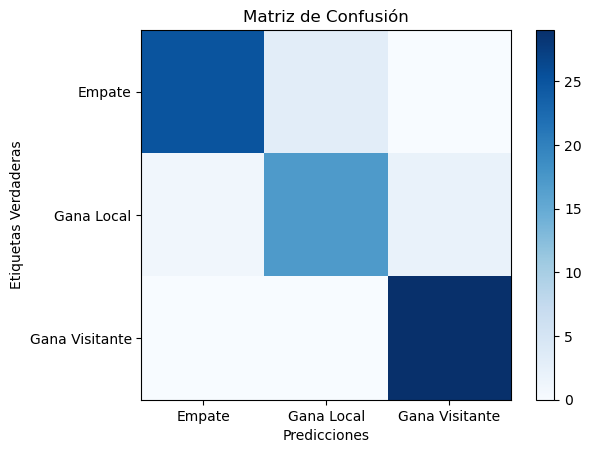

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde el enlace proporcionado
url = "https://www.football-data.co.uk/new/ARG.csv"
df = pd.read_csv(url)

# Función para realizar el análisis para un equipo específico
def analizar_equipo(equipo):
    # Filtrar el conjunto de datos para el equipo específico
    equipo_df = df[(df['Home'] == equipo) | (df['Away'] == equipo)]

    # Preprocesamiento de datos
    # Seleccionar características relevantes
    features = ['Home', 'Away', 'HG', 'AG', 'Res']

    # Filtrar solo las columnas necesarias
    equipo_df = equipo_df[features]

    # Codificar la variable objetivo (Res: Full Time Result)
    label_encoder = LabelEncoder()
    equipo_df['Res'] = label_encoder.fit_transform(equipo_df['Res'])

    # Crear variables dummy para los equipos (puede haber otras formas de codificar esto)
    equipo_df = pd.get_dummies(equipo_df, columns=['Home', 'Away'], drop_first=True)

    # Dividir el conjunto de datos en entrenamiento y prueba
    X = equipo_df.drop('Res', axis=1)
    y = equipo_df['Res']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar el modelo de clasificación (por ejemplo, un clasificador de bosques aleatorios)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Evaluar el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Mostrar resultados
    print(f'\nAnálisis para el equipo: {equipo}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')

    # Visualizar la matriz de confusión
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    plt.xticks([0, 1, 2], ['Empate', 'Gana Local', 'Gana Visitante'])
    plt.yticks([0, 1, 2], ['Empate', 'Gana Local', 'Gana Visitante'])
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Verdaderas')
    plt.show()

# Ingresa el nombre del equipo que deseas analizar
equipo_a_analizar = input("Ingresa el nombre del equipo que deseas analizar: ")
analizar_equipo(equipo_a_analizar)